In [1]:
import numpy as np
import numpy.random as random

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Example 1: Constraint optimisation

$$
\begin{aligned}
{\min_{x_1,x_2} (x_1-2)^2+(x_2-1)^2} & \quad \mathrm{s.t.}
 \left\{ \begin{array}{l}
          {x_1^2-x_2 \leq 0}\\
          {x_1+x_2-2 \leq 0}
         \end{array}
\right.
\end{aligned}
$$


In [2]:
from matplotlib import patheffects
def f(x):
    return (x[0] - 2)**2 + (x[1] - 1)**2

In [ ]:
x, y = np.mgrid[-2.9:5.8:.05, -2.5:5:.05]
x = x.T
y = y.T

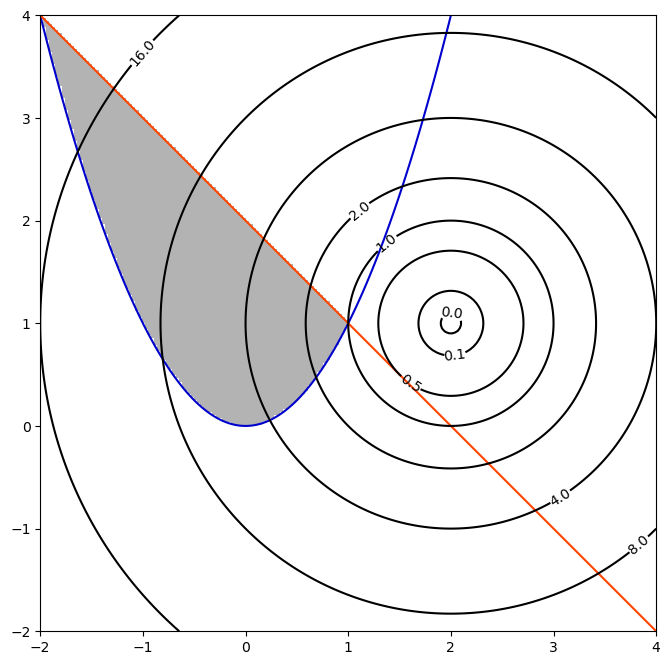

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))

nx1 = 200
nx2 = 200

# Set up survey vectors
xvec1 = np.linspace(-2, 4.0, nx1)
xvec2 = np.linspace(-2, 4.0, nx2)
x1, x2 = np.meshgrid(xvec1, xvec2)

# Evaluate stuff to plot
obj = (x1-2)**2 + (x2-1)**2 # objective function
c1  = x1**2 - x2            # first constraint
c2  = x1 + x2 - 2           # second constraint

plt.imshow( (c1<=0) & (c2<=0), extent=(x1.min(),x1.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.3);
cg1 = ax.contour(x1, x2, c1, [0], colors='mediumblue')
cg2 = ax.contour(x1, x2, c2, [0], colors='orangered')

cntr = ax.contour(x1, x2, obj, [0.01, 0.1, 0.5, 1, 2, 4, 8, 16], colors='black')
ax.clabel(cntr, fmt="%2.1f", use_clabeltext=True)


ax.set_xlim(-2, 4)
ax.set_ylim(-2, 4)

plt.show()

# Example 2: Simplexe

$$
\begin{aligned} {\max_{x,y} x+3y} & \quad \mathrm{s.t.}
 \left\{ \begin{array}{l}
          {2y\leq25-x}\\
          {4y\geq 2x - 8}\\
          {y\leq 2x-5}\\
          {x,y\geq 2}
         \end{array}
\right.
\end{aligned}
$$

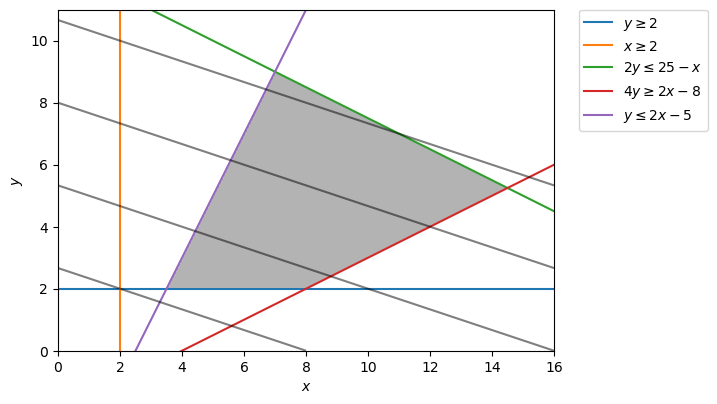

In [5]:
d = np.linspace(-2,16,300)

x,y = np.meshgrid(d,d)
plt.imshow( ((y>=2) & (2*y<=25-x) & (4*y>=2*x-8) & (y<=2*x-5)).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

x = np.linspace(0, 16, 300)

y1 = (x*0) + 0
x1 = (x*0) + 0
y2 = (25-x)/2.0
y3 = (2*x-8)/4.0
y4 = 2 * x -5

xx1, xx2 = np.meshgrid(x, x)
obj = xx1 + 3*xx2 # objective function

plt.plot(x, 2*np.ones_like(y1),label=r'$y\geq2$')
plt.plot(2*np.ones_like(x1), x,label=r'$x\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')

plt.contour(x, x, obj, [8, 16, 24, 32], colors='black', alpha=0.5)

plt.xlim(0,16)
plt.ylim(0,11)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

# Example 3: Quadratic function

For any $\mathbf{b}\in\mathbf{R^2}$ and matrix $Q$ semi-definite positive, a quadratic function
of two variables is defined as
$$
\begin{aligned}
f( \mathbf{x};Q,b,c)
&= \frac{1}{2}\mathbf{x}^T Q \mathbf{x} + \mathbf{x}^T \mathbf{b} + c\\
&= \frac{1}{2}q_{00} x_1^2 + \frac{1}{2}q_{11} x_2^2 + 2 q_{01} x_1 x_2 + b_0 x_1 + b_1 x_2 + c
\end{aligned}
$$

In [6]:
## generate random Q and b
random.seed(1)
n = 2
Qsqrt = np.random.randn(n,n).round()
b     = np.random.randn(n).round()
Q     = np.dot(Qsqrt.T,Qsqrt)
Q, b, np.linalg.inv(Q)

(array([[ 5., -1.],
        [-1.,  2.]]),
 array([ 1., -2.]),
 array([[0.22222222, 0.11111111],
        [0.11111111, 0.55555556]]))

In [7]:
# quadratic function
def f(x1,x2,Q,b):
    return (Q[0][0]*x1*x1 + Q[1][1]*x2*x2) + 2*Q[0][1]*x1*x2 + b[0]*x1 + b[1]*x2

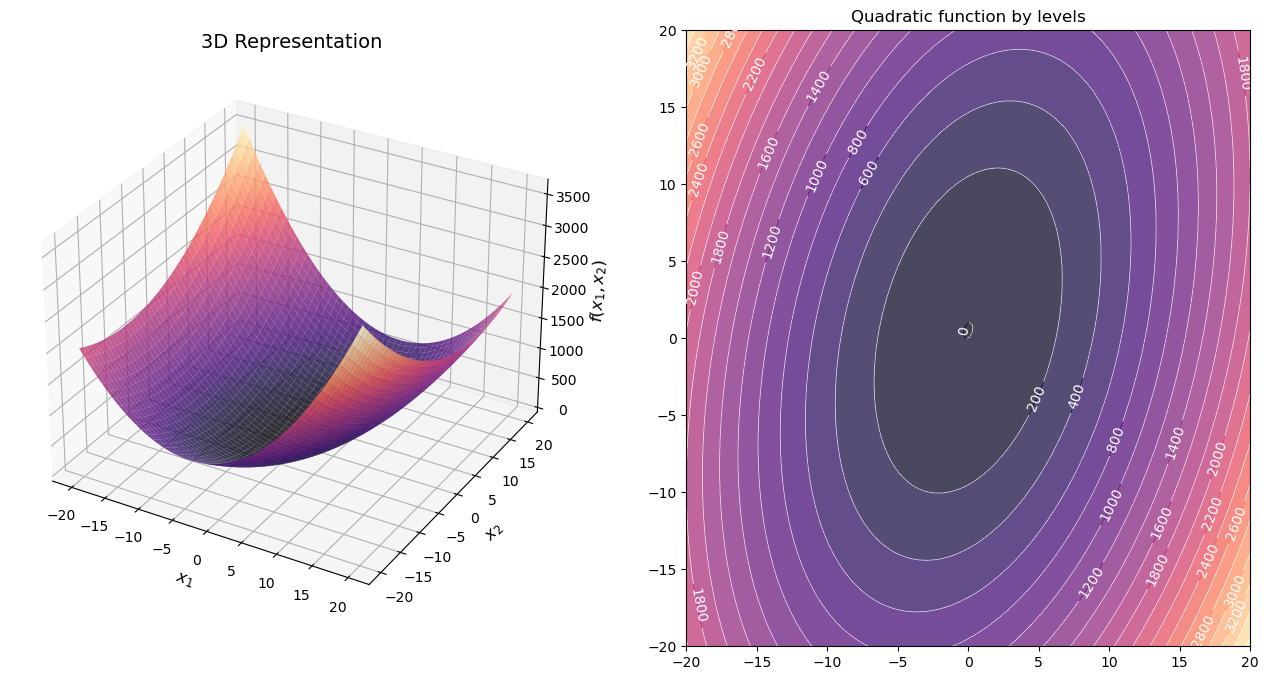

In [8]:
## plot f
x1,x2 = np.linspace(-20,20,200), np.linspace(-20,20,200)
X1,X2 = np.meshgrid(x1,x2)

fig, axes = plt.subplots(1,2,figsize=(16,8))

axes[1].contourf(X1,X2,f(X1,X2,Q,b),20,alpha=0.75,cmap=plt.cm.magma)
C=axes[1].contour(X1,X2,f(X1,X2,Q,b),20,colors='white',linewidths=0.5)

axes[1].set_title("Quadratic function by levels")
axes[1].clabel(C,inline=True,fontsize=10)

Z = f(X1, X2, Q, b)

axes[0].remove()
axes[0] = fig.add_subplot(1,2,1,projection='3d')
 
axes[0].plot_surface(X1, X2, Z, cmap=plt.cm.magma, alpha=0.8)
 
axes[0].set_title('3D Representation', fontsize=14)
axes[0].set_xlabel('$x_1$', fontsize=12)
axes[0].set_ylabel('$x_2$', fontsize=12)
axes[0].set_zlabel('$f(x_1,x_2)$', fontsize=12)
 
plt.show()

# Example 4: Rosenbrock function

$$ f(x,y) = (1-x)^2 + 100(y-x^2)^2,$$

The function has a global minimum at $(1, 1)$.

If an optimization method starts at the point $(-1.2, 1)$,
it has to find its way to the other side of a flat, curved valley to find the optimal point.

In [9]:
r = lambda x,y : (1-x)**2 + 100*(y-x**2)**2

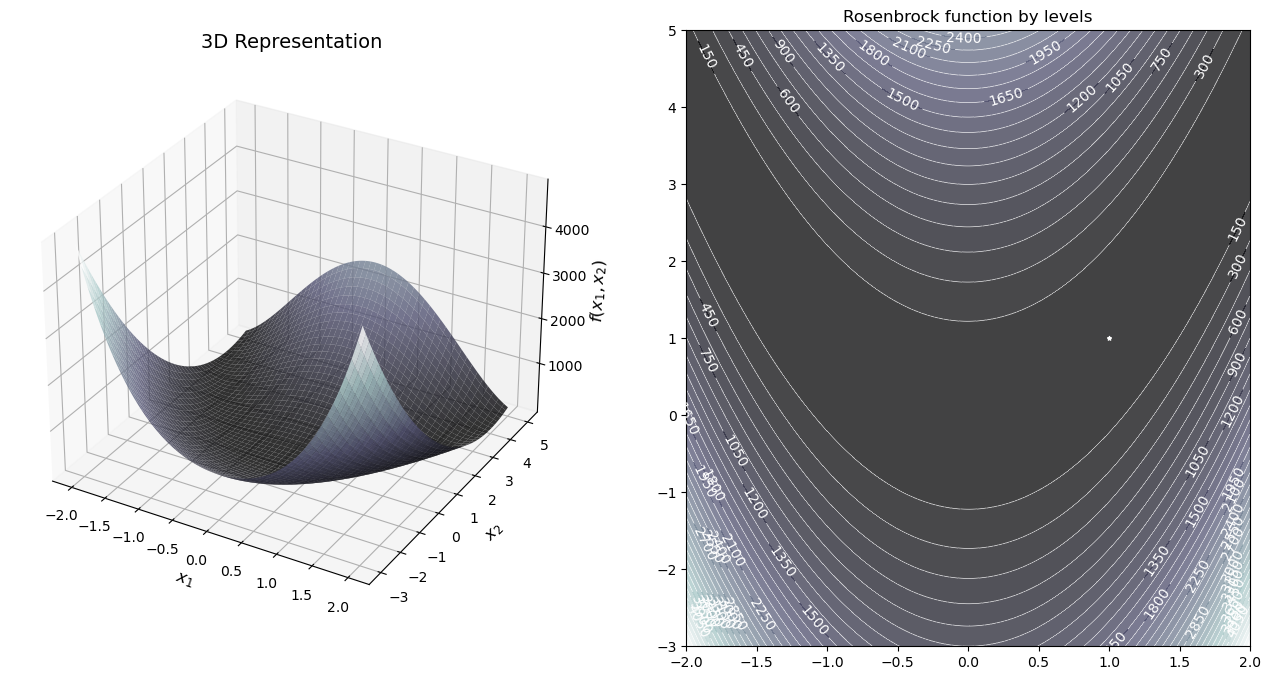

In [10]:


## plot f
x1,x2 = np.linspace(-2,2,200), np.linspace(-3,5,200)
X1,X2 = np.meshgrid(x1,x2)

fig, axes = plt.subplots(1,2,figsize=(16,8))

Z = r(X1, X2)
axes[1].contourf(X1,X2,Z,40,alpha=0.75,cmap=plt.cm.bone)
C=axes[1].contour(X1,X2,Z,40,colors='white',linewidths=0.5)

axes[1].set_title("Rosenbrock function by levels")
axes[1].clabel(C,inline=True,fontsize=10)
axes[1].scatter(1,1, marker="*", color='w', s=8)


axes[0].remove()
axes[0] = fig.add_subplot(1,2,1,projection='3d')
 
axes[0].plot_surface(X1, X2, Z, cmap=plt.cm.bone, alpha=0.8)
 
axes[0].set_title('3D Representation', fontsize=14)
axes[0].set_xlabel('$x_1$', fontsize=12)
axes[0].set_ylabel('$x_2$', fontsize=12)
axes[0].set_zlabel('$f(x_1,x_2)$', fontsize=12)
 
plt.show()

# Example 5: Three-hump camel function 

$$ f(x,y) = 2x^{2} - 1.05x^{4} + \frac{x^{6}}{6} + xy + y^{2}$$


The function has two local minima and a global minima at $f(0,0) = 0$.

In [12]:
camel = lambda x,y : 2*x**2 - 1.05*x**4 + x**6/6 + x*y + y**2

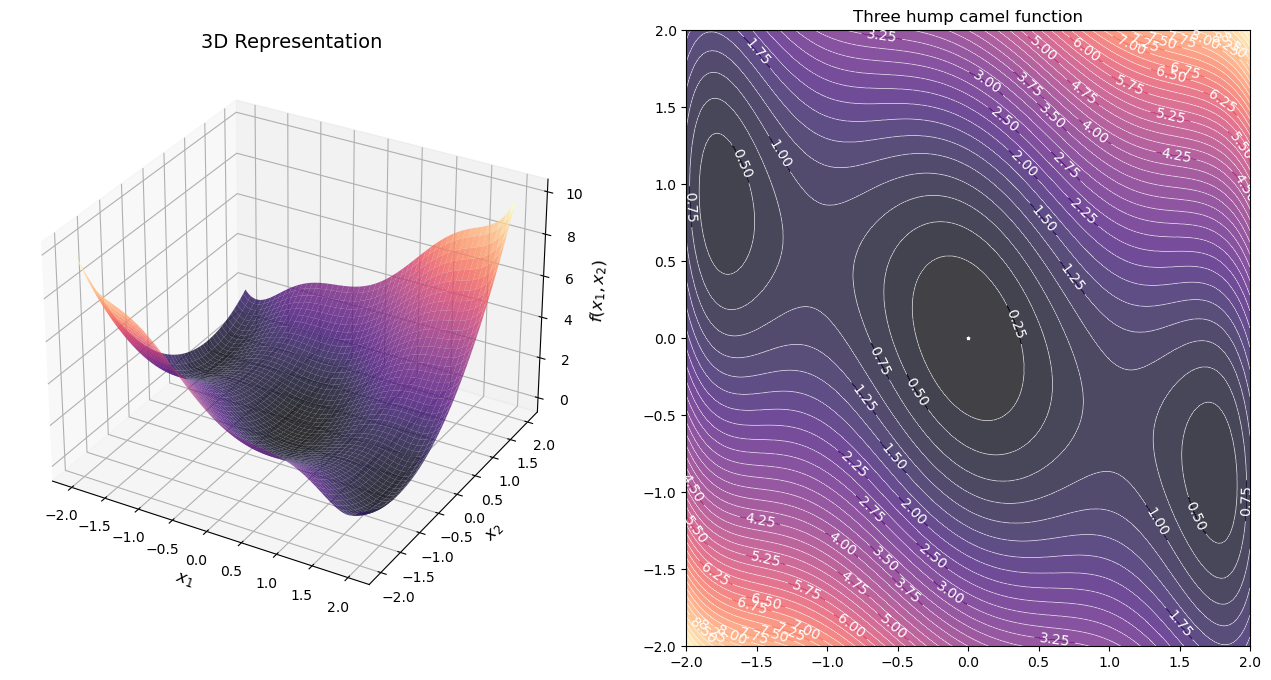

In [13]:


## plot f
x1,x2 = np.linspace(-2,2,200), np.linspace(-2,2,200)
X1,X2 = np.meshgrid(x1,x2)

fig, axes = plt.subplots(1,2,figsize=(16,8))

Z = camel(X1, X2)
axes[1].contourf(X1,X2,Z,40,alpha=0.75,cmap=plt.cm.magma)
C=axes[1].contour(X1,X2,Z,40,colors='white',linewidths=0.5)

axes[1].set_title("Three hump camel function")
axes[1].clabel(C,inline=True,fontsize=10)
axes[1].scatter(0,0, marker="*", color='w', s=4)

axes[0].remove()
axes[0] = fig.add_subplot(1,2,1,projection='3d')
 
axes[0].plot_surface(X1, X2, Z, cmap=plt.cm.magma, alpha=0.8)
 
axes[0].set_title('3D Representation', fontsize=14)
axes[0].set_xlabel('$x_1$', fontsize=12)
axes[0].set_ylabel('$x_2$', fontsize=12)
axes[0].set_zlabel('$f(x_1,x_2)$', fontsize=12)
axes[0].scatter(0,0,0, marker="*", color='w', s=2)
 
plt.show()